# Exercise on haberMan's data

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
Number of Instances: 306
Number of Attributes: 4 (including the class attribute)
Attribute Information:
1) Age of patient at time of operation (numerical)
2) Patient's year of operation (year - 1900, numerical)
3) Number of positive axillary nodes detected (numerical)--> it is a parameter to see if cancer cells are present
4) Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

 objective:--> here with the given data we can determine whether a patient have survived for 5 years or longer(survival status 1) or if the patient lived for less than 5 years(survival status 2), by taking the inputs such as age at the time of operation, patient's year operation, number of axillary nodes detected. The main aim is to identify the parameter for which we can determine or seperate the survival status of the patient


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#importing habermans data

haberMan=pd.read_csv("haberman.csv")

print(haberMan.shape)

(306, 4)


In [7]:
print(haberMan.columns)

Index(['age', 'year', 'axillary node', 'survival status'], dtype='object')


In [14]:
haberMan["survival status"].value_counts()

#looks like the data is highly imbalanced

1    225
2     81
Name: survival status, dtype: int64

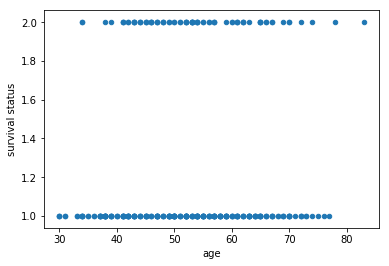

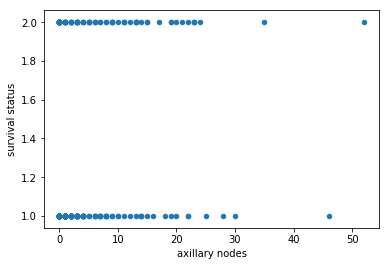

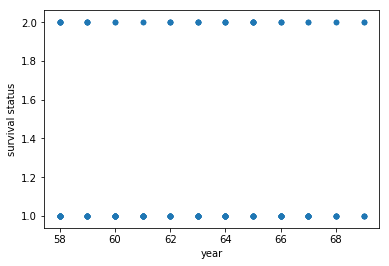

In [15]:
#scatter plot--> it is a 2d plot between survival status vs age/axillary nodes/year
haberMan.plot(kind="scatter",x="age",y="survival status");
haberMan.plot(kind="scatter",x="axillary nodes",y="survival status");
haberMan.plot(kind="scatter",x="year",y="survival status");

plt.show()

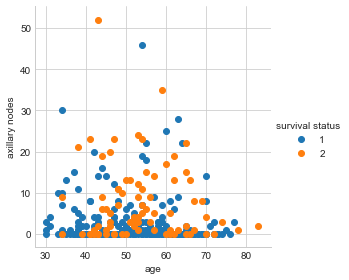

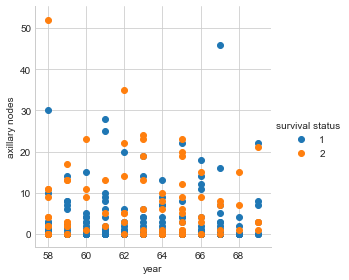

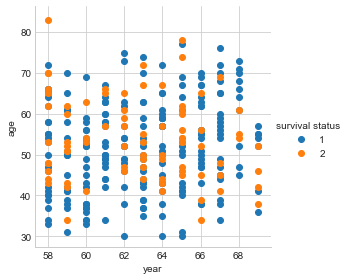

In [16]:
# 2-D Scatter plot with color-coding for survival status vs age/axillary nodes/year
sns.set_style("whitegrid");
sns.FacetGrid(haberMan, hue="survival status", size=4) \
   .map(plt.scatter, "age", "axillary nodes") \
   .add_legend();

sns.set_style("whitegrid");
sns.FacetGrid(haberMan, hue="survival status", size=4) \
   .map(plt.scatter, "year", "axillary nodes") \
   .add_legend();

sns.set_style("whitegrid");
sns.FacetGrid(haberMan, hue="survival status", size=4) \
   .map(plt.scatter, "year", "age") \
   .add_legend();


plt.show();

Observation:
    Tried to see if in any combination if we are able to find better plots where we can distinguish the data
    In either way of comparision we are not able to seperate the data.

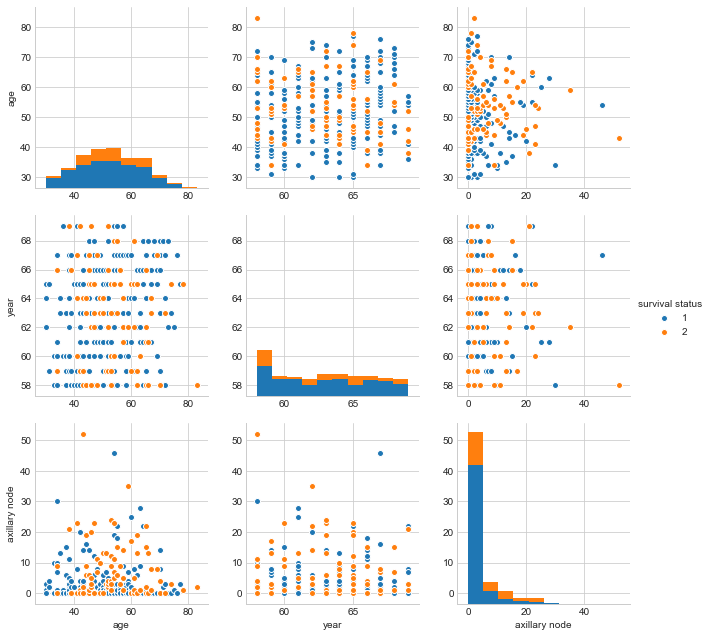

In [9]:
#bivariate analysis:
# pairwise scatter plot: Pair-Plot

plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberMan, hue="survival status", size=3,vars=['age','year','axillary node']);
plt.show()

in either of the pair plots we are not able to find the way to seperate the survival status.

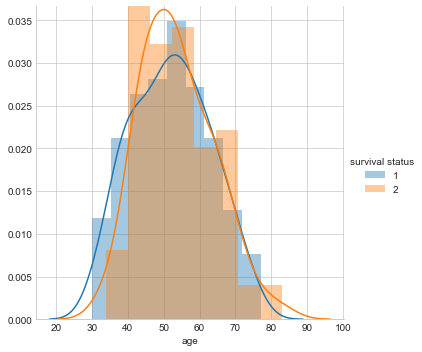

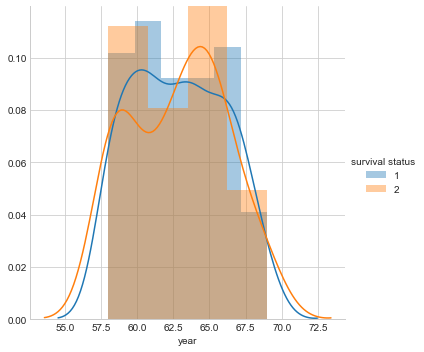

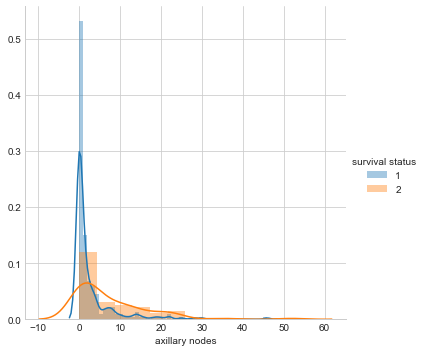

In [18]:
#Histogram and PDF plots

sns.FacetGrid(haberMan, hue="survival status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();

sns.FacetGrid(haberMan, hue="survival status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();

sns.FacetGrid(haberMan, hue="survival status", size=5) \
   .map(sns.distplot, "axillary nodes") \
   .add_legend();

plt.show();

Observation: In all the plots almost all are overlapping. It is not possible to distinguish the survival status


[ 0.05333333  0.10666667  0.12444444  0.09333333  0.16444444  0.16444444
  0.09333333  0.11111111  0.06222222  0.02666667]
[ 30.   34.7  39.4  44.1  48.8  53.5  58.2  62.9  67.6  72.3  77. ]
[ 0.03703704  0.12345679  0.19753086  0.19753086  0.13580247  0.12345679
  0.09876543  0.04938272  0.02469136  0.01234568]
[ 34.   38.9  43.8  48.7  53.6  58.5  63.4  68.3  73.2  78.1  83. ]


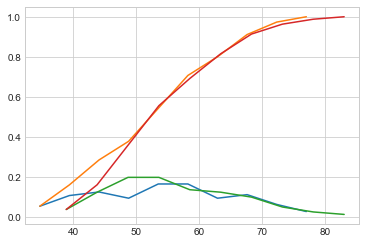

[ 0.18666667  0.10666667  0.10222222  0.07111111  0.09777778  0.10222222
  0.06666667  0.09777778  0.09333333  0.07555556]
[ 58.   59.1  60.2  61.3  62.4  63.5  64.6  65.7  66.8  67.9  69. ]
[ 0.25925926  0.04938272  0.03703704  0.08641975  0.09876543  0.09876543
  0.16049383  0.07407407  0.04938272  0.08641975]
[ 58.   59.1  60.2  61.3  62.4  63.5  64.6  65.7  66.8  67.9  69. ]


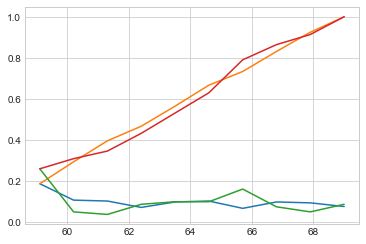

[ 0.83555556  0.08        0.02222222  0.02666667  0.01777778  0.00444444
  0.00888889  0.          0.          0.00444444]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]
[ 0.56790123  0.14814815  0.13580247  0.04938272  0.07407407  0.
  0.01234568  0.          0.          0.01234568]
[  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]


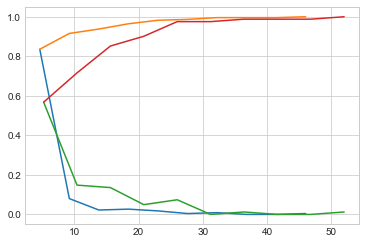

In [31]:
#cdf plots 

#defining survival stats
survival_status1 = haberMan.loc[haberMan["survival status"] == 1];
survival_status2 = haberMan.loc[haberMan["survival status"] == 2];


#cdf plots for age vs survival_status. 
counts, bin_edges = np.histogram(survival_status1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF-->CDF is nothing but cummilative sum of PDF or simply the integration of PDF.
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(survival_status2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

#cdf plots for year vs survival_status. 
counts, bin_edges = np.histogram(survival_status1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF-->CDF is nothing but cummilative sum of PDF or simply the integration of PDF.
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(survival_status2['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();


#cdf plots for axillary nodes vs survival_status. 
counts, bin_edges = np.histogram(survival_status1['axillary nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF-->CDF is nothing but cummilative sum of PDF or simply the integration of PDF.
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(survival_status2['axillary nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();



#

Observation:
    IN either of the plots tried all the three combinations but couldn't diff much as all the values are overlapping
    
    

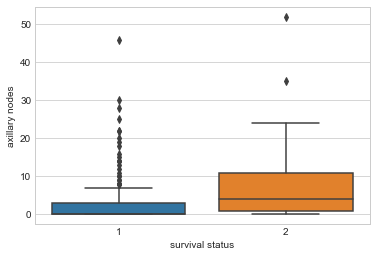

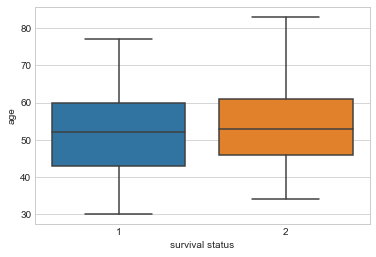

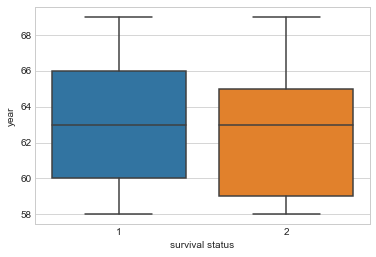

In [32]:
#box plots

sns.boxplot(x='survival status',y='axillary nodes', data=haberMan);
plt.show()
sns.boxplot(x='survival status',y='age', data=haberMan);
plt.show()
sns.boxplot(x='survival status',y='year', data=haberMan);
plt.show()

Observation:
    1) could see in either ways(cdf plots or box plots) we are not able to seperate the data effeciently. 
    2) Out of all the three box plots, axillary node vs survival status is having a slight better chances for classyfing the data.
    3) but if we observe auxillary nodes vs survival status box&whiskers plot, there was a slight area where the points were separatred, we can tell if auxillary node>  around 5 then the survival status is 2 and if it is below 5, our result will be 50% error. 
    

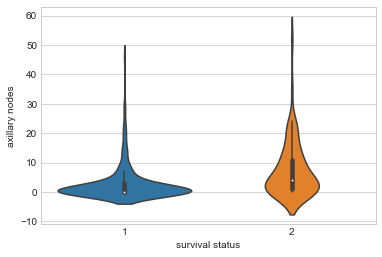

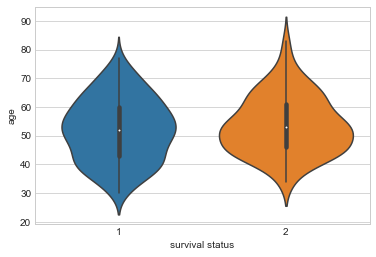

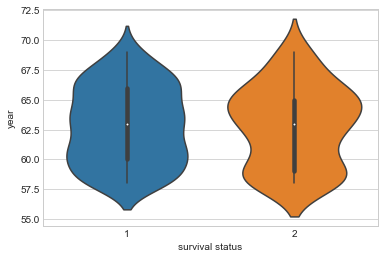

In [26]:
#violin plots
sns.violinplot(x='survival status',y='axillary nodes', data=haberMan, size=0)
plt.show()
sns.violinplot(x='survival status',y='age', data=haberMan, size=0)
plt.show()
sns.violinplot(x='survival status',y='year', data=haberMan, size=0)
plt.show()

Cocnlusions:
    even in bivariate or univariate analysis we are not able to seperate this data this might be due to highly imbalanced data.
    But in box plots, axilary node vs survival status has a slight chance for prediction. 